In [18]:
import numpy as np
import matplotlib.pylab as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
import pandas as pd

In [2]:
X , y = make_classification(n_samples=1000,n_features=10,n_informative=3,n_redundant=0,n_repeated=0,n_classes=2,random_state=1994,shuffle=False)

In [19]:
X = pd.DataFrame(X,columns=['a','b','c','d','e','f','g','h','i','j'])

In [3]:
forest = ExtraTreesClassifier(n_estimators=1000,random_state=1994)

In [4]:
forest.fit(X,y)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=1, oob_score=False, random_state=1994,
           verbose=0, warm_start=False)

In [5]:
importances = forest.feature_importances_

In [6]:
importances

array([ 0.08842593,  0.10585545,  0.51109893,  0.03995199,  0.04162261,
        0.04144764,  0.04142091,  0.04330228,  0.04443357,  0.0424407 ])

In [7]:
std = np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)

In [8]:
std

array([ 0.02669948,  0.0242119 ,  0.06810728,  0.01152296,  0.01219017,
        0.01148698,  0.01169956,  0.01267513,  0.01236437,  0.01240856])

In [24]:
indices = np.argsort(importances)[::-1] # 从大到小排序
print(indices)
labels = X.columns[indices]
print(labels)

[2 1 0 8 7 9 4 5 6 3]
Index(['c', 'b', 'a', 'i', 'h', 'j', 'e', 'f', 'g', 'd'], dtype='object')


In [11]:
print("Feature Ranking")
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f+1,indices[f],importances[indices[f]]))

Feature Ranking
1. feature 2 (0.511099)
2. feature 1 (0.105855)
3. feature 0 (0.088426)
4. feature 8 (0.044434)
5. feature 7 (0.043302)
6. feature 9 (0.042441)
7. feature 4 (0.041623)
8. feature 5 (0.041448)
9. feature 6 (0.041421)
10. feature 3 (0.039952)


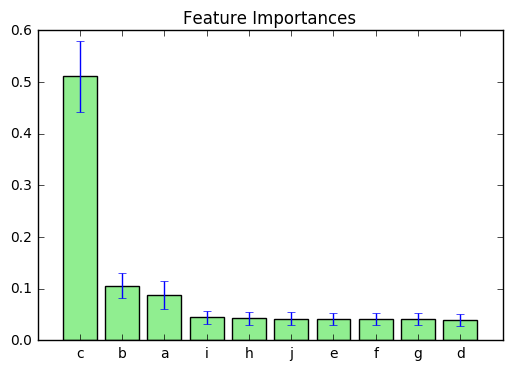

In [26]:
plt.figure()
plt.title("Feature Importances")
plt.bar(range(X.shape[1]),importances[indices],color = 'lightgreen',yerr = std[indices],align="center")
plt.xticks(range(X.shape[1]),labels)
plt.xlim([-1,X.shape[1]])
plt.show()